In [21]:
import os
from pathlib import Path

import pandas as pd
import numpy as np

from astropy.timeseries import LombScargle
from astropy.time import Time

chosen_name = 'FRB20180916B' # (77)

DATAPATH = os.getenv('DATAPATH')
CATALOG_PATH = Path(DATAPATH, 'raw', 'catalog2023', 'catalog2023_profile.parquet')
CATALOG_PATH_CSV = Path(DATAPATH, 'raw', 'catalog2023', 'chimefrb2023repeaters.csv')
CATALOG1_PATH_PARQUET = Path(DATAPATH, 'catalog_1.parquet')

cat1 = pd.read_parquet(CATALOG1_PATH_PARQUET)[["eventname","repeater_name", "mjd_400", "flux"]]
cat1['catalog'] = 'Catalog 1'
cat2023 = pd.read_csv(CATALOG_PATH_CSV)[["tns_name","repeater_name","mjd_400", "flux"]].rename(columns={'tns_name':'eventname'})
cat2023['catalog'] = 'Catalog 2023'
data = pd.concat([cat1, cat2023]).reset_index()
data['mjd'] = data['mjd_400']
data['obs'] = 0.
data.loc[data['repeater_name'] == chosen_name, "obs"] = data['flux']
data['obs'].describe()

count    945.000000
mean       0.184974
std        0.771765
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        5.000000
Name: obs, dtype: float64

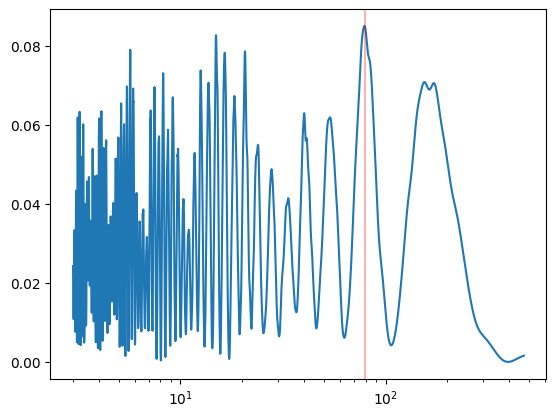

In [22]:
import astropy.units as u
import seaborn as sns

time = Time(data['mjd_400'].to_numpy(), format='mjd')
obs = data['obs'].to_numpy()

freq_min = 1 / (3 * u.day)
freq_max = 1/(len(data) *.5 * u.day)

freq_grid = np.linspace(freq_max,freq_min, 10_000)

LS = LombScargle(time, obs)
power = LS.power(freq_grid)

period = 1/freq_grid[np.nanargmax(power)]

g = sns.lineplot(x=1/freq_grid, y=power)
g.axvline(period.value, color='red', alpha=0.3)
# g.axvline(2*period.value, color='red', alpha=0.3)
# g.axvline(3*period.value, color='red', alpha=0.3)
# g.axvline(0.5*period.value, color='red', alpha=0.3)
# g.axvline(0.25*period.value, color='red', alpha=0.3)
# g.set_ylim(0,0.003)
g.set_xscale('log')

In [23]:
period.value

79.0504216444132